In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Display the first few rows
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [4]:
# Get basic information
df.info()

# Get descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

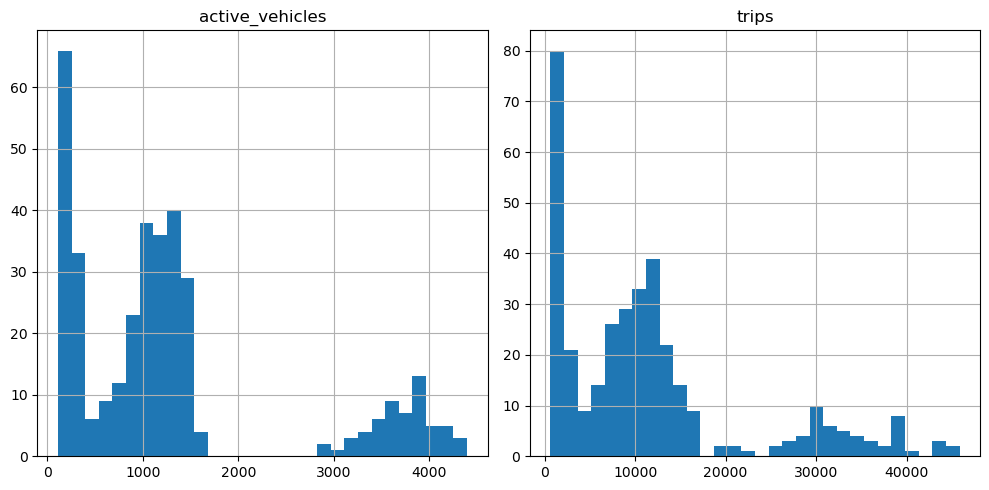

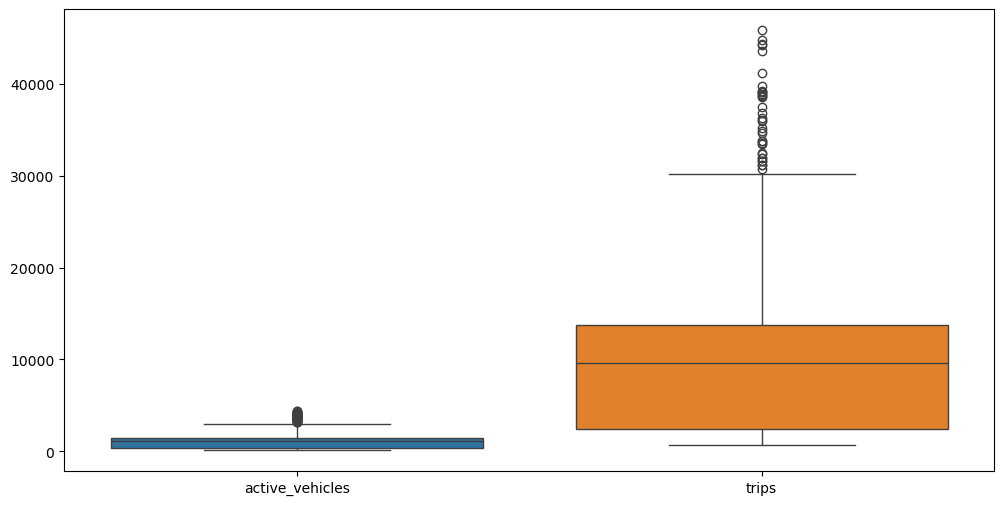

In [6]:
# Plot histograms
df[['active_vehicles', 'trips']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['active_vehicles', 'trips']])
plt.show()


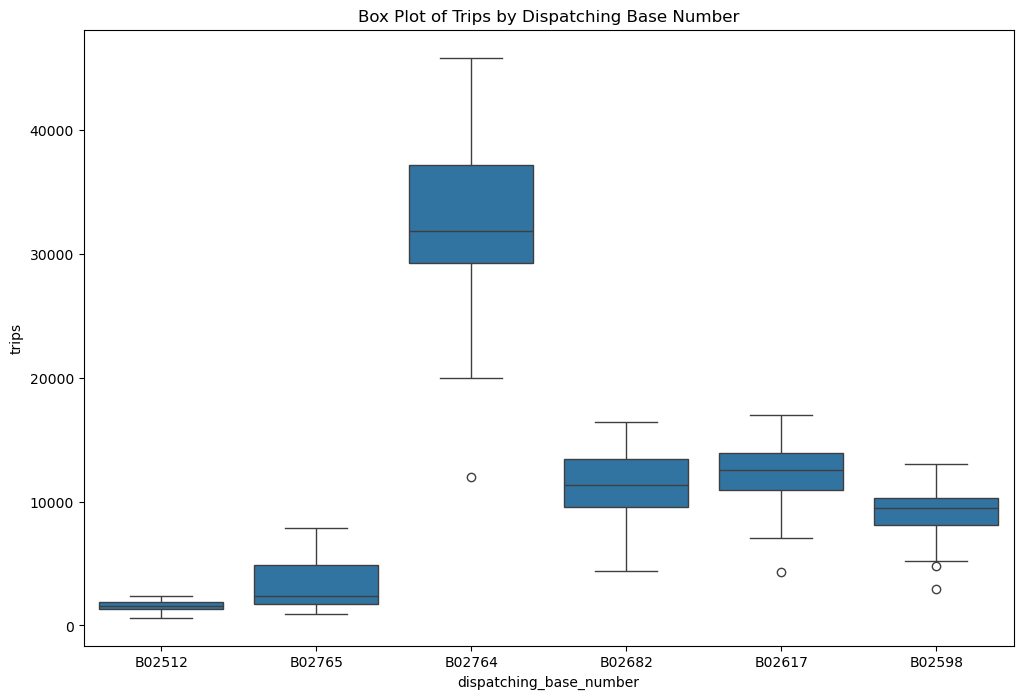

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='dispatching_base_number', y='trips', data=df)
plt.title('Box Plot of Trips by Dispatching Base Number')
plt.show()



<Figure size 1400x700 with 0 Axes>

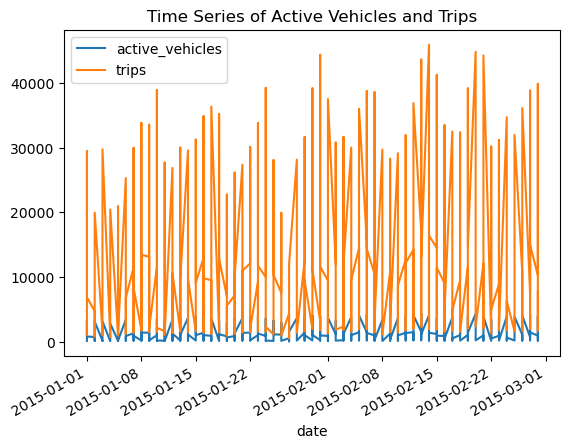

<Figure size 1400x700 with 0 Axes>

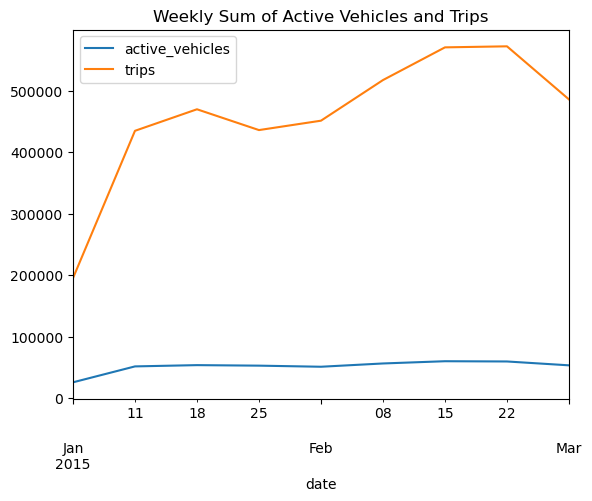

In [10]:
# Plot time series of active_vehicles and trips
df['date'] = pd.to_datetime(df['date']) 
df.set_index('date', inplace=True) 

plt.figure(figsize=(14, 7))
df[['active_vehicles', 'trips']].plot()
plt.title('Time Series of Active Vehicles and Trips')
plt.show()

# Resample data by week to smooth out the series
weekly_data = df.resample('W').sum()

plt.figure(figsize=(14, 7))
weekly_data[['active_vehicles', 'trips']].plot()
plt.title('Weekly Sum of Active Vehicles and Trips')
plt.show()


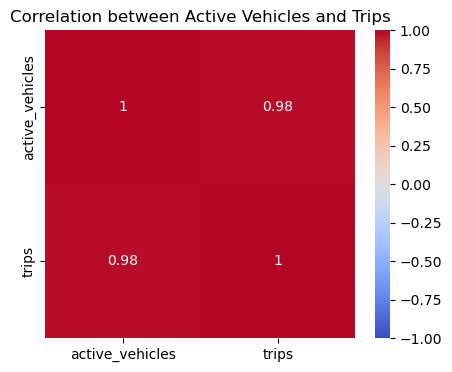

In [11]:
# Correlation between active vehicles and trips
correlation = df[['active_vehicles', 'trips']].corr()

# Plot a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Active Vehicles and Trips')
plt.show()


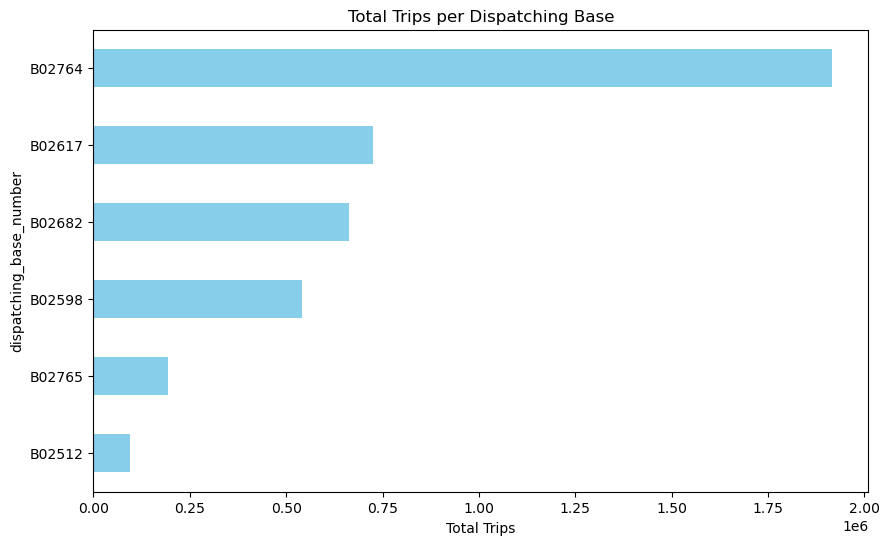

In [18]:
# Group by dispatching_base and calculate the total trips and active vehicles
base_stats = df.groupby('dispatching_base_number').sum()

# Plot the total trips per dispatch base
plt.figure(figsize=(10, 6))
base_stats['trips'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Trips per Dispatching Base')
plt.xlabel('Total Trips')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create features from 'date'
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# Encode the categorical dispatching_base
le = LabelEncoder()
df['dispatching_base_encoded'] = le.fit_transform(df['dispatching_base_number'])

# Define the features (X) and target (y)
X = df[['active_vehicles', 'dispatching_base_encoded', 'year', 'month', 'day_of_week']]
y = df['trips']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 1603.0242453061662
R²: 0.9761690098860476


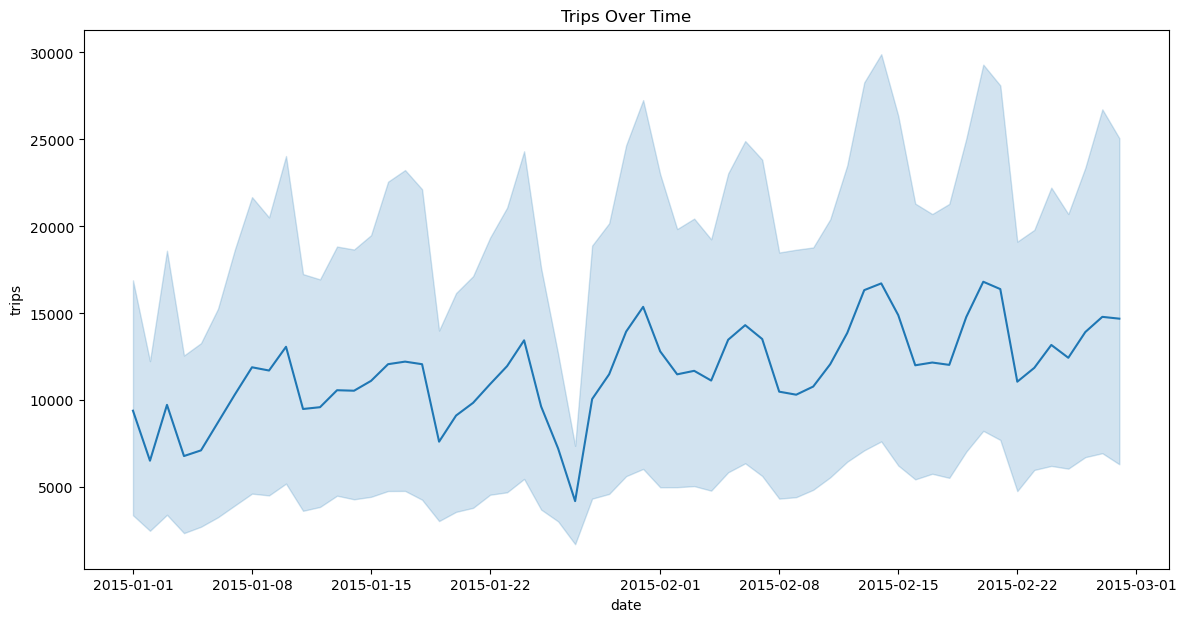

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='trips', data=df)
plt.title('Trips Over Time')
plt.show()



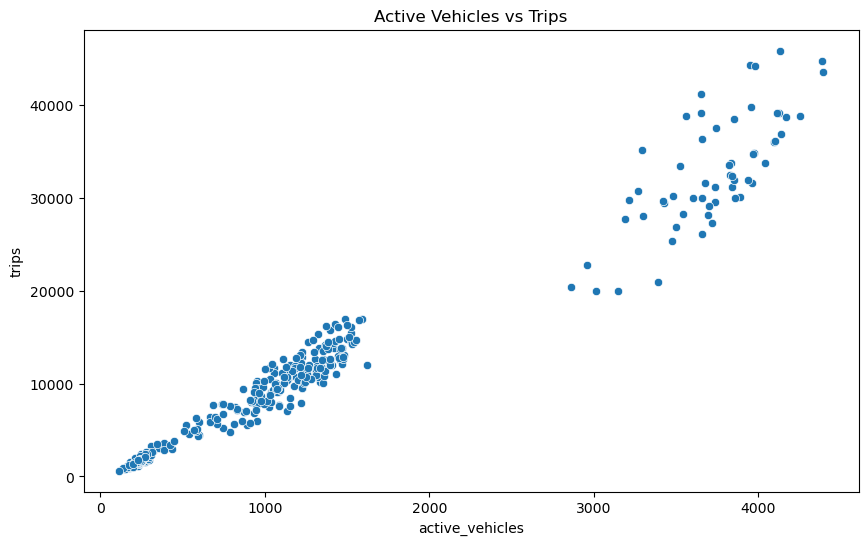

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='active_vehicles', y='trips', data=df)
plt.title('Active Vehicles vs Trips')
plt.show()


In [23]:

df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month



KeyError: 'date'

In [24]:
X = df[['active_vehicles', 'day_of_week', 'month']]
y = df['trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 2566915.9179073106
R^2 Score: 0.9761947061001274


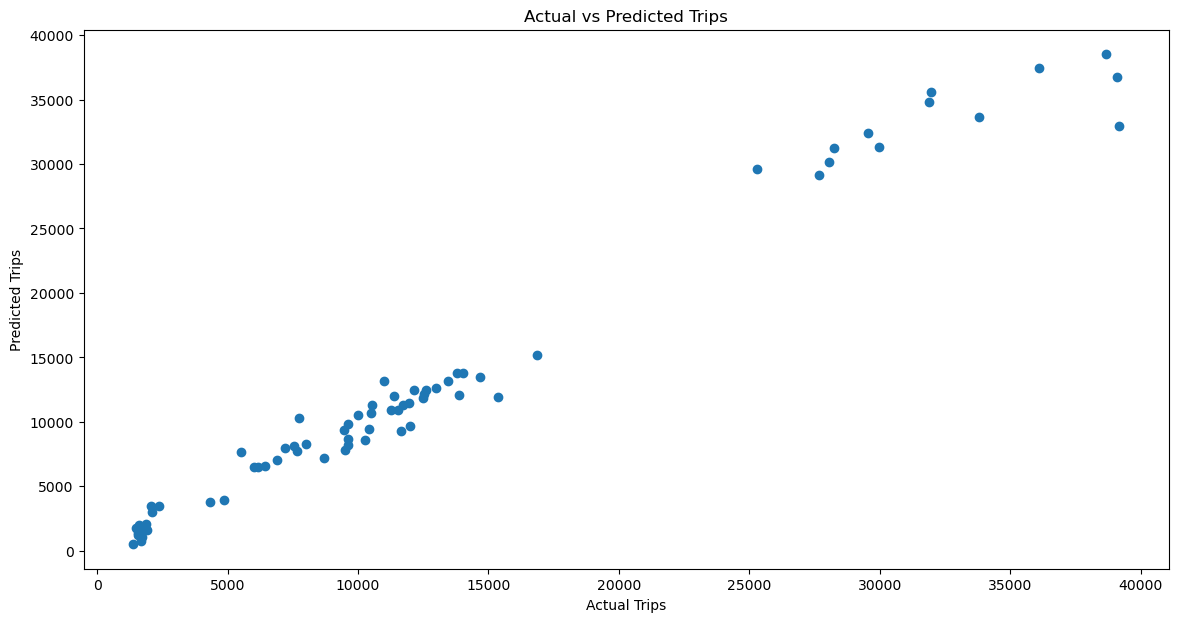

In [27]:
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()


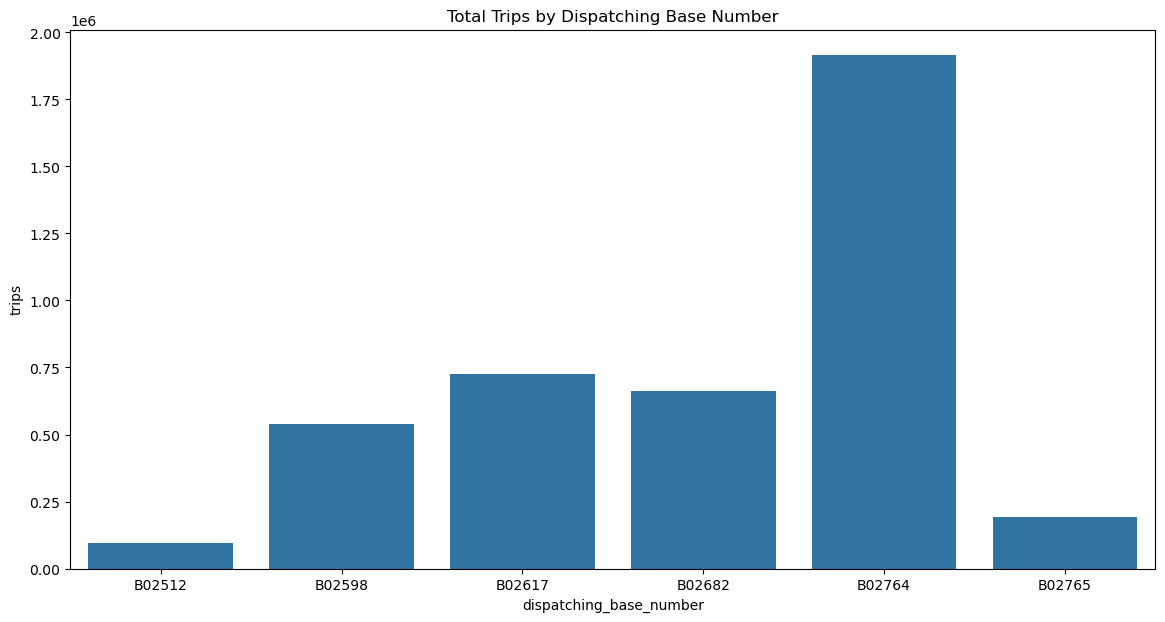

In [28]:
base_group = df.groupby('dispatching_base_number').agg({'trips': 'sum', 'active_vehicles': 'mean'}).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='dispatching_base_number', y='trips', data=base_group)
plt.title('Total Trips by Dispatching Base Number')
plt.show()


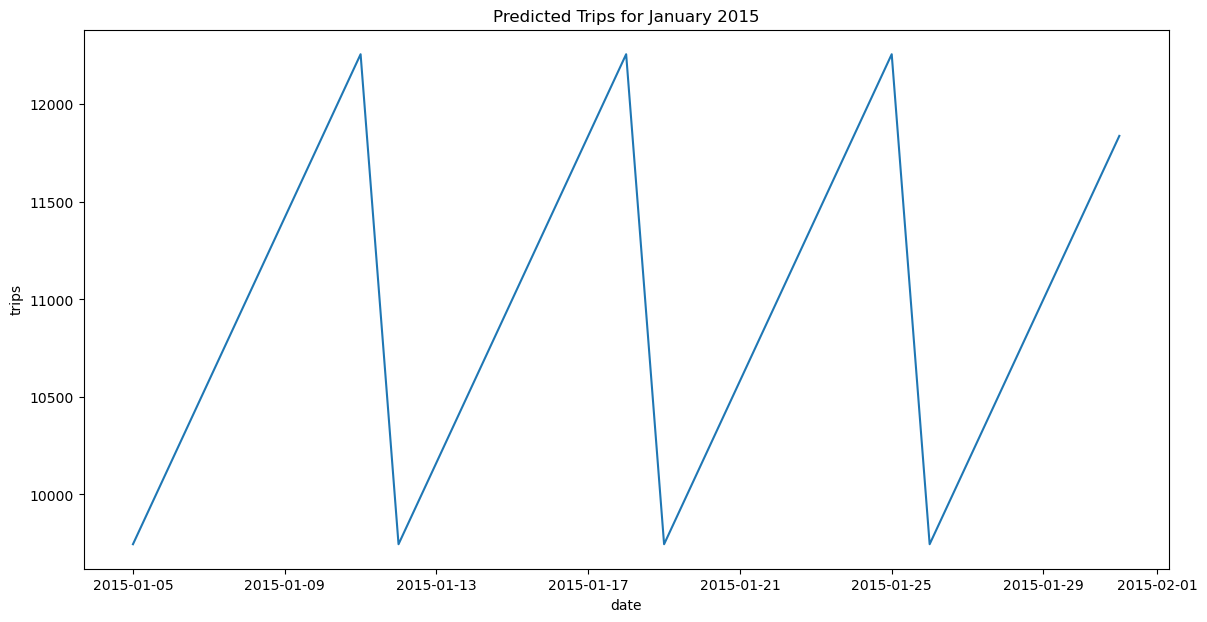

In [29]:
future_dates = pd.date_range(start='2015-01-05', end='2015-01-31')
future_data = pd.DataFrame({'date': future_dates})
future_data['day_of_week'] = future_data['date'].dt.dayofweek
future_data['month'] = future_data['date'].dt.month
future_data['active_vehicles'] = df['active_vehicles'].mean()  # Simplified assumption
future_data['trips'] = model.predict(future_data[['active_vehicles', 'day_of_week', 'month']])

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='trips', data=future_data)
plt.title('Predicted Trips for January 2015')
plt.show()


Mean Squared Error: 1784909.2991663525
R^2 Score: 0.9834469488638681


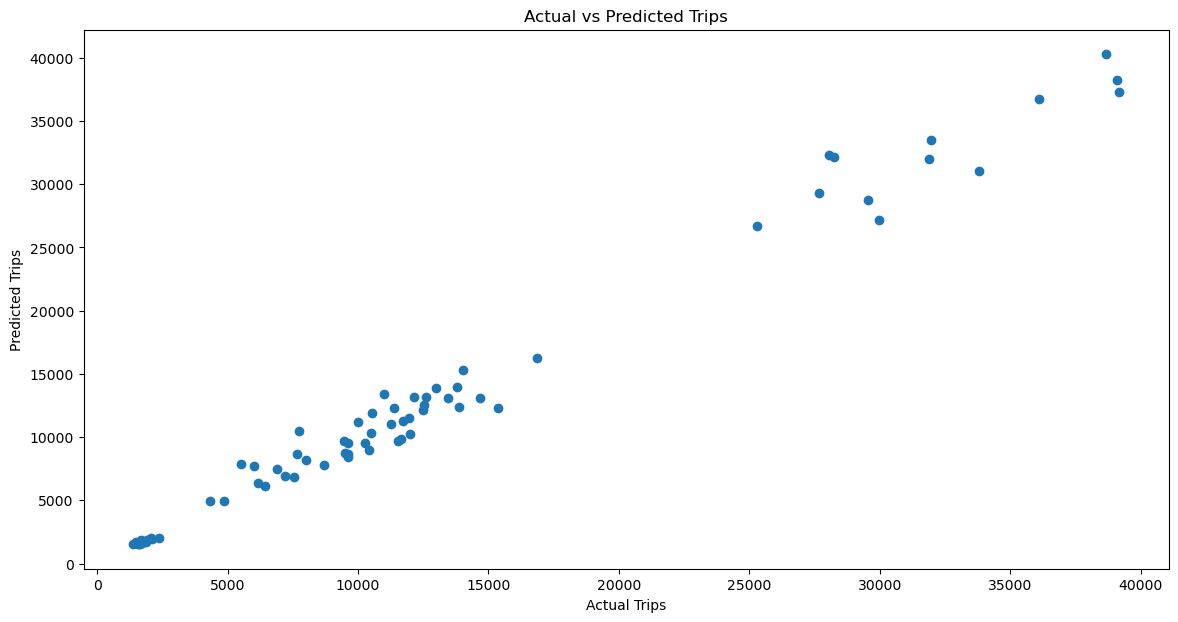

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test Split
X = df[['active_vehicles', 'day_of_week', 'month']]
y = df['trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Plotting Predictions vs Actual
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()


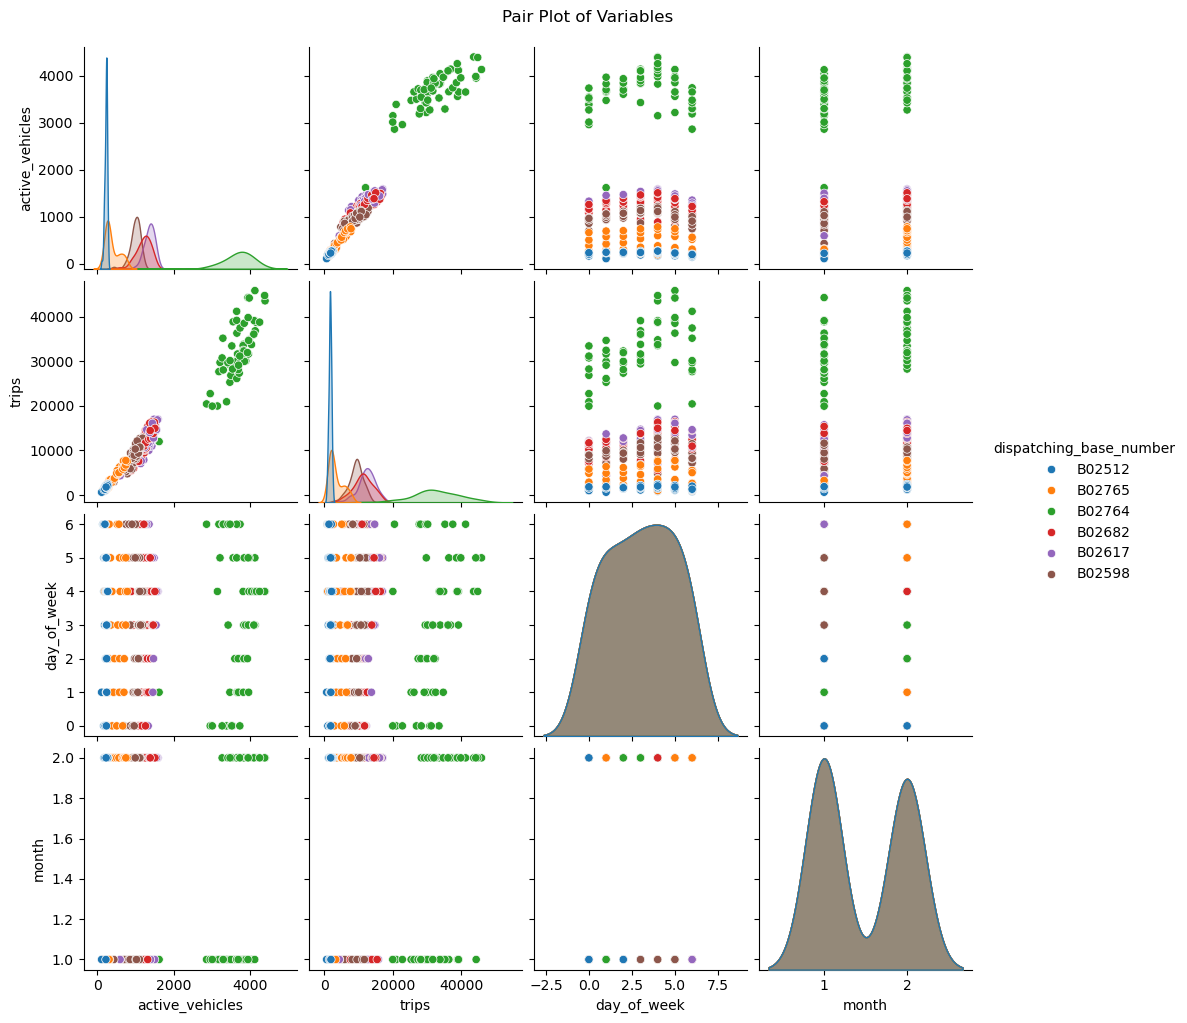

In [50]:
sns.pairplot(df, vars=['active_vehicles', 'trips', 'day_of_week', 'month'], hue='dispatching_base_number')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()


